In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('breast cancer data.csv')

In [22]:
data = data.drop('Sample code number', axis=1)

In [23]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


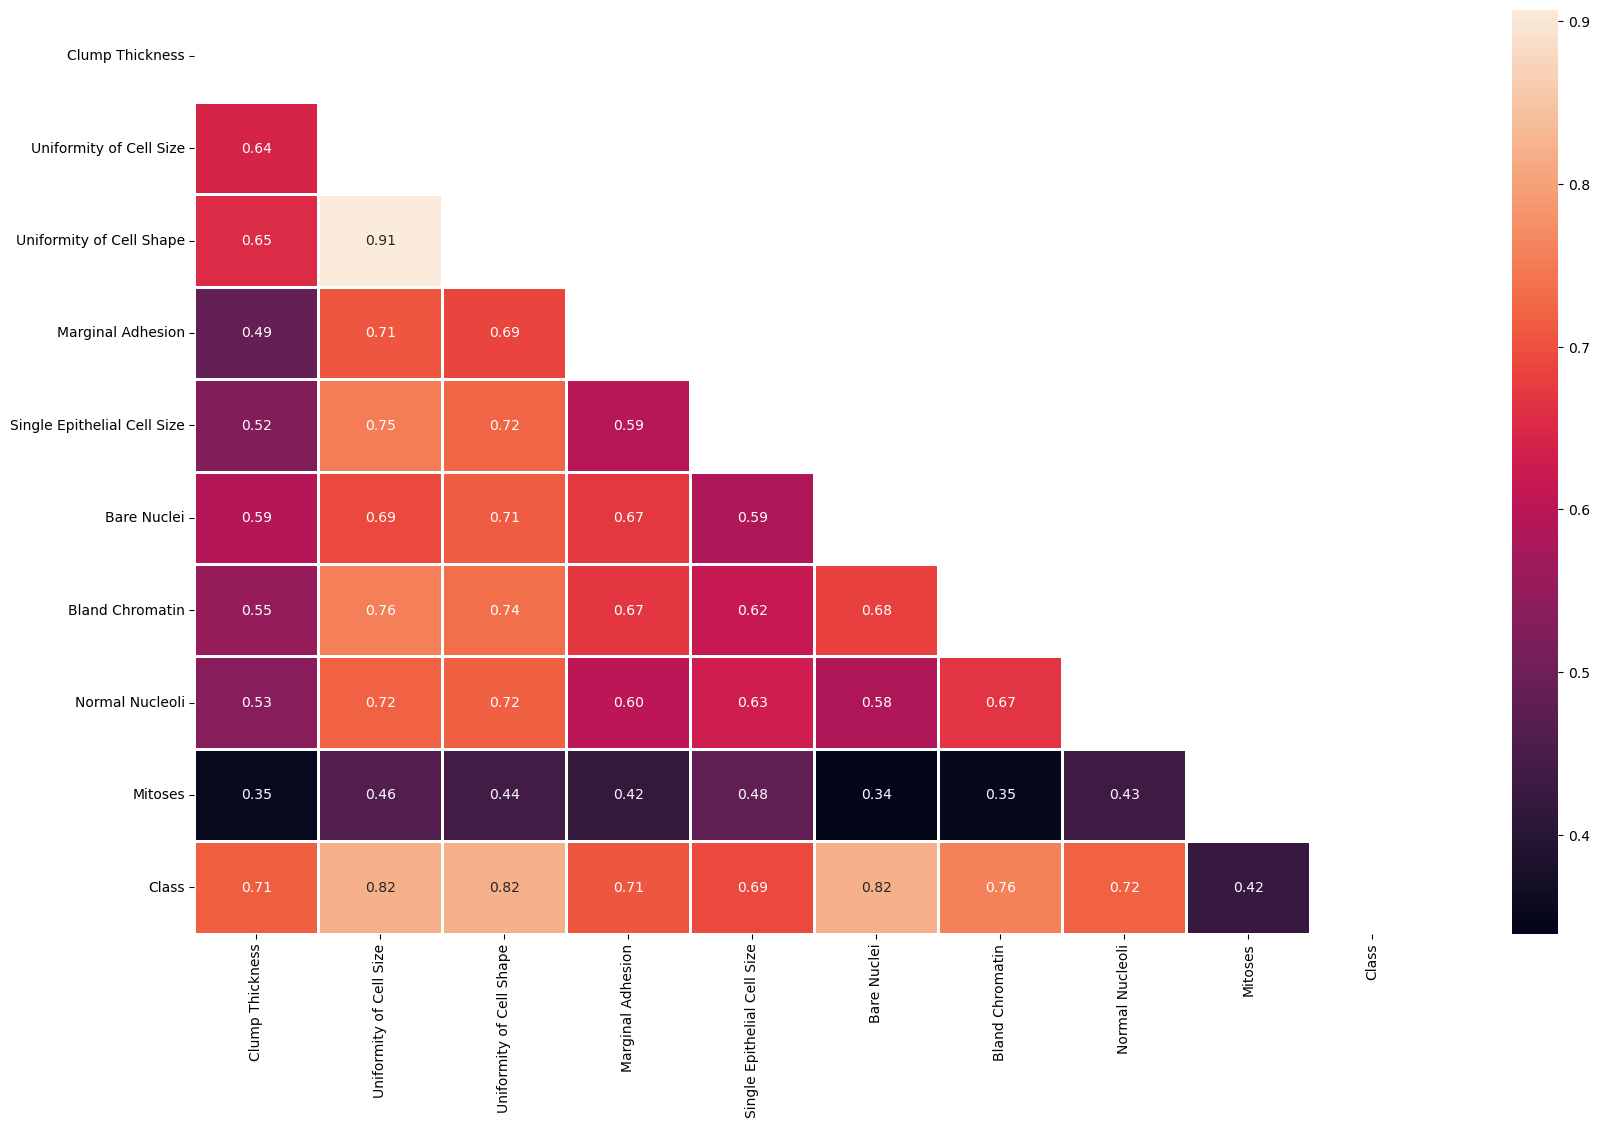

In [24]:
import seaborn as sns

plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

C:\Users\Nicolaus\AppData\Local\Temp\ipykernel_11428\3478045290.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

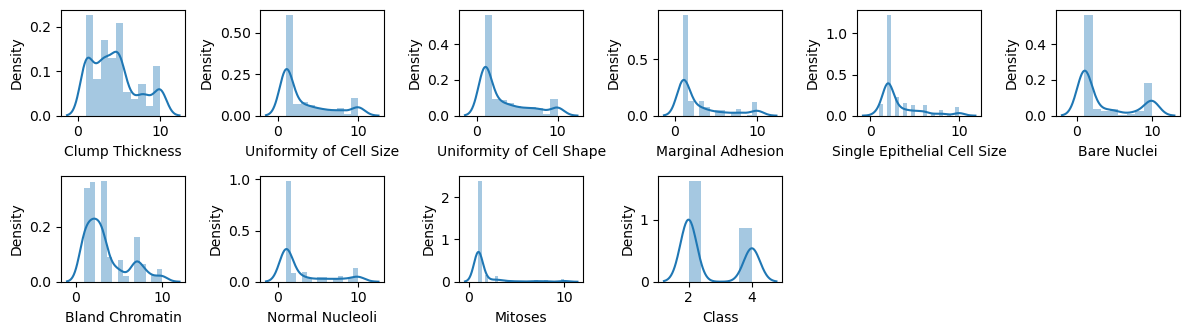

In [26]:
plt.figure(figsize = (12, 8))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
X = data.drop('Class', axis=1)
y = data['Class']

In [28]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [29]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini', random_state=0, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

y_train_pred = rfc.predict(X_train)
print('Accuracy Model: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)))
y_test_pred = rfc.predict(X_test)
print('Accuracy test data: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)))

mse = mean_squared_error(y_test, y_test_pred)
r2_score = r2_score(y_test, y_test_pred)
print('Mean Squared Error: {:.4f}'.format(mse))
print('R2 Score: {:.4f}'.format(r2_score))

Accuracy Model: 0.98%
Accuracy test data: 0.97%
Mean Squared Error: 0.1168
R2 Score: 0.8740


In [101]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [102]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print('Accuracy Model:', accuracy_score(y_train, y_train_pred))
print('Accuracy test data:', accuracy_score(y_test, y_test_pred))

Accuracy Model: 0.9633699633699634
Accuracy test data: 0.9562043795620438


In [103]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

print('Accuracy Model:', accuracy_score(y_train, y_train_pred))
print('Accuracy test data:', accuracy_score(y_test, y_test_pred))

Accuracy Model: 0.9652014652014652
Accuracy test data: 0.948905109489051


In [105]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [106]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print('Accuracy Model:', accuracy_score(y_train, y_train_pred))
print('Accuracy test data:', accuracy_score(y_test, y_test_pred))

Accuracy Model: 0.9725274725274725
Accuracy test data: 0.9562043795620438
